<div class='bar_title'></div>

*Smart Cities and Geospatial Data Analysis*

# Analyzing Spatial Data Using Choropleth Mapping

__Gunther Gust__ <br>
Chair for Enterprise AI <br>
Data Driven Decisions Group

Winter Semester 23/24

<img src="images/d3.png" style="width:20%; float:left;" />

## Content

- Data Sample: Mexican States
- Creating Choropleths
- Changing the Zoom in Choropleth Maps
- Creating Pooled Choropleths

*Credits: Most of the material is taken from [Arribas-Bel, Geographic Data Science](https://darribas.org/gds_course/content/home.html#)*


In this session, we will build on all we have learnt so far about loading and manipulating (spatial) data and apply it to one of the most commonly used forms of spatial analysis: choropleths. 

Choropleths are maps that display the spatial distribution of a variable encoded in a color scheme, also called *palette*. 

Although there are many ways in which you can convert the values of a variable into a specific color, we will focus in this context only on a handful of them, in particular:

* Unique values
* Equal interval
* Quantiles
* Fisher-Jenks

## Data Sample

Before all this mapping fun, let us get the importing of libraries and data loading out of the way:

In [31]:
!pip freeze >> requirements.txt

In [1]:
%pip install matplotlib geopandas seaborn pandas pysal numpy dill

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import geopandas
from pysal.lib import examples
import seaborn as sns
import pandas as pd
from pysal.viz import mapclassify
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/home/vscode/.local/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_2438/4030745000.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly 

To mirror the [original chapter](https://geographicdata.science/book/notebooks/05_choropleth.html) this section is based on, we will use the same dataset: the [Mexico GDP per capita dataset](https://geographicdata.science/book/data/mexico/README.html), which we can access as a PySAL example dataset.


You can read more about PySAL example datasets [here](https://pysal.org/libpysal/notebooks/examples.html)


We can get a short explanation of the dataset through the `explain` method:

In [3]:
examples.explain("mexico")

mexico

Decennial per capita incomes of Mexican states 1940-2000
--------------------------------------------------------

* mexico.csv: attribute data. (n=32, k=13)
* mexico.gal: spatial weights in GAL format.
* mexicojoin.shp: Polygon shapefile. (n=32)

Data used in Rey, S.J. and M.L. Sastre Gutierrez. (2010) "Interregional inequality dynamics in Mexico." Spatial Economic Analysis, 5: 277-298.



For this section, we will read the ESRI shapefile, which we can do by pointing `geopandas.read_file` to the `.shp` file. The utility function `get_path` makes it a bit easier for us:

In [4]:
db = geopandas.read_file(examples.get_path("mexicojoin.shp"))

And, from now on, `db` is a table as we are used to so far in this course:

In [5]:
db.head()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2731956.859,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7961008.285,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."


In [6]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   POLY_ID     32 non-null     int64   
 1   AREA        32 non-null     float64 
 2   CODE        32 non-null     object  
 3   NAME        32 non-null     object  
 4   PERIMETER   32 non-null     float64 
 5   ACRES       32 non-null     float64 
 6   HECTARES    32 non-null     float64 
 7   PCGDP1940   32 non-null     float64 
 8   PCGDP1950   32 non-null     float64 
 9   PCGDP1960   32 non-null     float64 
 10  PCGDP1970   32 non-null     float64 
 11  PCGDP1980   32 non-null     float64 
 12  PCGDP1990   32 non-null     float64 
 13  PCGDP2000   32 non-null     float64 
 14  HANSON03    32 non-null     float64 
 15  HANSON98    32 non-null     float64 
 16  ESQUIVEL99  32 non-null     float64 
 17  INEGI       32 non-null     float64 
 18  INEGI2      32 non-null     float64 
 19  MA

The data however does not include a CRS:

In [7]:
db.crs

To be able to add baselayers, we need to specify one. Looking at the details and the original reference, we find the data are expressed in longitude and latitude, so the CRS we can use is `EPSG:4326`. Let's add it to `db`:

In [8]:
db.crs = "EPSG:4326"
db.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Now we are fully ready to map!

## Choropleths

### Categorical values

A choropleth for categorical variables simply assigns a different color to every potential value in the series. The main requirement in this case is then for the color scheme to reflect the fact that different values are not ordered or follow a particular scale.



In Python, creating categorical choropleths is possible with one line of code. To demonstrate this, we can plot the Mexican states and the region each belongs to based on the Mexican Statistics Institute (coded in our table as the `INEGI` variable):

<Axes: >

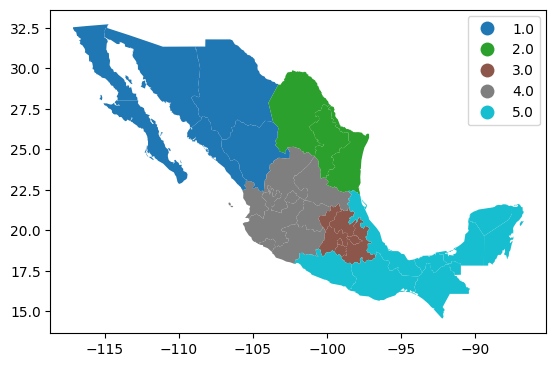

In [9]:
db.plot(
    column="INEGI", 
    categorical=True, 
    legend=True, 
)

Let us stop for a second in a few crucial aspects:

* Note how we are using the same approach as for basic maps, the command `plot`, but we now need to add the argument `column` to specify which column in particular is to be represented.
* Since the variable is categorical we need to make that explicit by setting the argument `categorical` to `True`.
* As an optional argument, we can set `legend` to `True` and the resulting figure will include a legend with the names of all the values in the map.
* Unless we specify a different colormap, the selected one respects the categorical nature of the data by not implying a gradient or scale but a qualitative structure.

### Continuous values: Equal interval scale

If, instead of categorical variables, we want to display the geographical distribution of a continuous phenomenon, we need to select a way to encode each value into a color. One potential solution is applying what is usually called "equal intervals". The intuition of this method is to **split the *range* of the distribution, the difference between the minimum and maximum value, into equally large segments** and to assign a different color to each of them according to a palette that reflects the fact that values are ordered.



Creating the choropleth is relatively straightforward in Python. For example, to create an equal interval on the GDP per capita in 2000 (`PCGDP2000`), we can run a similar command as above:

<Axes: >

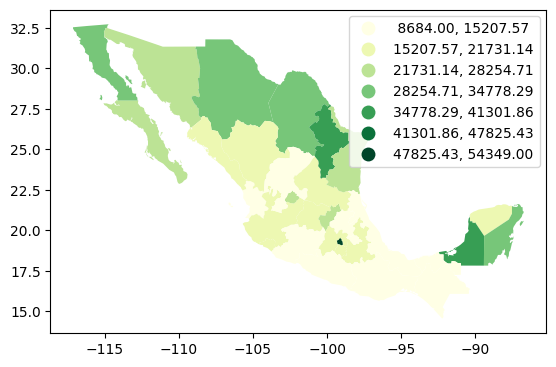

In [10]:
db.plot(
    column="PCGDP2000", 
    scheme="equal_interval", 
    k=7,
    cmap="YlGn",
    legend=True
)

Pay attention to the key differences:

* Instead of specifyig `categorical` as `True`, we replace it by the argument `scheme`, which we will use for all choropleths that require a continuous classification scheme. In this case, we set it to `equal_interval`.
* We set the number of intervals (=colors) to 7. Note that the plotting method calculates the bins itself under the hood for us.
* As optional arguments, we can change the colormap to a yellow to green gradient, which is one of the recommended ones by [ColorBrewer](http://colorbrewer2.org/) for a sequential palette. 


Now, let's dig a bit deeper into the classification, and how exactly we are encoding values into colors. Each segment, also called bins or buckets, can also be calculated using the library `mapclassify` from the `PySAL` family:

In [11]:
classi = mapclassify.EqualInterval(db["PCGDP2000"], k=7)
classi

EqualInterval

      Interval         Count
----------------------------
[ 8684.00, 15207.57] |    10
(15207.57, 21731.14] |    10
(21731.14, 28254.71] |     5
(28254.71, 34778.29] |     4
(34778.29, 41301.86] |     2
(41301.86, 47825.43] |     0
(47825.43, 54349.00] |     1

The only additional argument to pass to `Equal_Interval`, other than the actual variable we would like to classify is the number of segments we want to create, `k`, which we are arbitrarily setting to seven in this case. This will be the number of colors that will be plotted on the map so, although having several can give more detail, at some point the marginal value of an additional one is fairly limited, given the ability of the brain to tell any differences.

Once we have classified the variable, we can check the actual break points where values stop being in one class and become part of the next one:

In [12]:
classi.bins

array([15207.57142857, 21731.14285714, 28254.71428571, 34778.28571429,
       41301.85714286, 47825.42857143, 54349.        ])

The array of breaking points above implies that any value in the variable below 15,207.57 will get the first color in the gradient when mapped, values between 15,207.57 and 21,731.14 the next one, and so on.


The key characteristic in equal interval maps is that the bins are allocated based on the magnitude on the values, **irrespective of how many obervations fall into each bin** as a result of it. 
* In highly skewed distributions, this can result in bins with a large number of observations, while others only have a handful of outliers. This can be seen in the summary table printed out above, where ten states are in the first group, but only one of them belong to the one with highest values. 


This can also be represented visually with a kernel density plot where the break points are included as well:

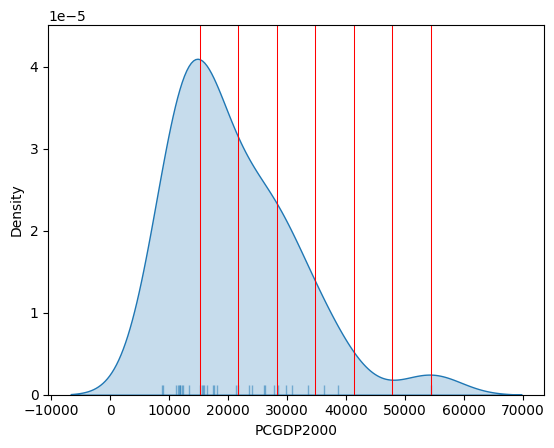

In [13]:
# Plot the kernel density estimation (KDE)
sns.kdeplot(db["PCGDP2000"], fill=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(db["PCGDP2000"], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)


Technically speaking, the figure is created by overlaying a KDE plot with vertical bars for each of the break points. This makes much more explicit the issue highlighed by which the first bin contains a large amount of observations while the one with top values only encompasses a handful of them.

### Continuous values: Quantiles

One solution to obtain a more balanced classification scheme is using quantiles. This, by definition, assigns the **same amount of values to each bin**: 
* the entire series is laid out in order and break points are assigned in a way that leaves exactly the same amount of observations between each of them. 
* This "observation-based" approach contrasts with the "value-based" method of equal intervals and, although it can obscure the magnitude of extreme values, it can be more informative in cases with skewed distributions.


The code required to create the choropleth mirrors that needed above for equal intervals:

<Axes: >

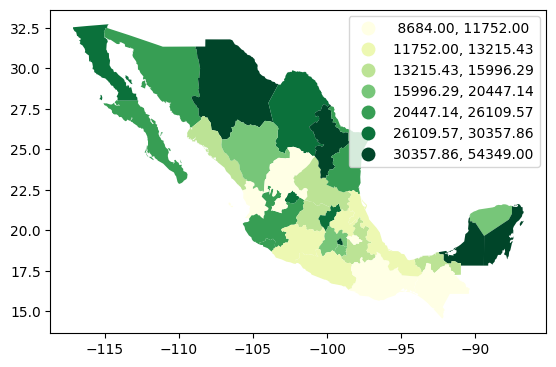

In [14]:
db.plot(
    column="PCGDP2000", 
    scheme="quantiles", 
    k=7,
    cmap="YlGn",
    legend=True
)

Note how, in this case, the amount of polygons in each color is by definition much more balanced (almost equal in fact, except for rounding differences). This obscures outlier values, which get blurred by significantly smaller values in the same group, but allows to get **more detail in the "most populated" part of the distribution**, where instead of only white polygons, we can now discern more variability.

To get further insight into the quantile classification, let's calculate it with `mapclassify`:

In [15]:
classi = mapclassify.Quantiles(db["PCGDP2000"], k=7)
classi

Quantiles

      Interval         Count
----------------------------
[ 8684.00, 11752.00] |     5
(11752.00, 13215.43] |     4
(13215.43, 15996.29] |     5
(15996.29, 20447.14] |     4
(20447.14, 26109.57] |     5
(26109.57, 30357.86] |     4
(30357.86, 54349.00] |     5

And, similarly, the bins can also be inspected:

In [16]:
classi.bins

array([11752.        , 13215.42857143, 15996.28571429, 20447.14285714,
       26109.57142857, 30357.85714286, 54349.        ])

The visualization of the distribution can be generated in a similar way as well:

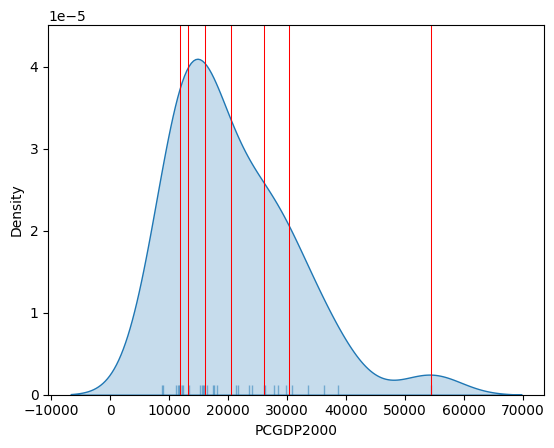

In [17]:
# Plot the kernel density estimation (KDE)
sns.kdeplot(db["PCGDP2000"], fill=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(db["PCGDP2000"], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)

### Continuous values: Jenks-Caspall

* Aims to minimize the sum of absolute deviations around class means
* One-dimension case of the widely used K-Means algorithm for clustering
* Heuristic algorithm, depends on the initial class assignment. No guaranteed optimality

<Axes: >

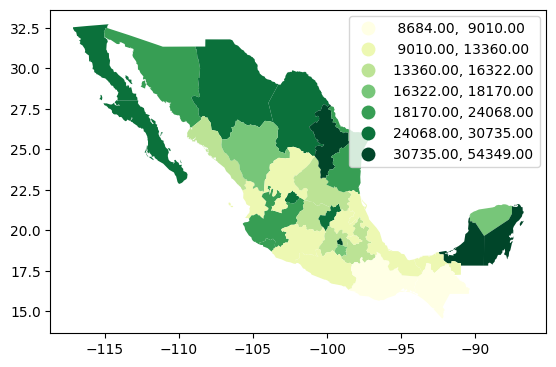

In [18]:
db.plot(
    column="PCGDP2000", 
    scheme="jenks_caspall", 
    k=7,
    cmap="YlGn",
    legend=True
)

### Continuous values: Fisher-Jenks

Fisher-Jenks algorithm is a dynamic programming approach to minimize the sum of the absolute deviations around class medians. In contrast to the Jenks-Caspall algorithm, the Fisher-Jenks alorithm is guaranteed to produce an optimal classification for a prespecified number of classes.

<Axes: >

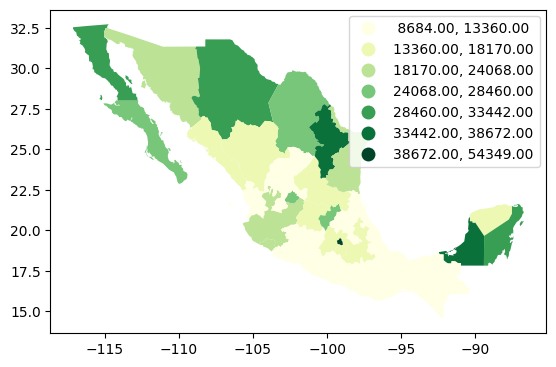

In [19]:
db.plot(
    column="PCGDP2000", 
    scheme="fisher_jenks", 
    k=7,
    cmap="YlGn",
    legend=True
)

The same classification can be obtained with a similar approach as before:

In [20]:
classi = mapclassify.FisherJenks(db["PCGDP2000"], k=7)
classi

FisherJenks

      Interval         Count
----------------------------
[ 8684.00, 13360.00] |    10
(13360.00, 18170.00] |     8
(18170.00, 24068.00] |     4
(24068.00, 28460.00] |     4
(28460.00, 33442.00] |     3
(33442.00, 38672.00] |     2
(38672.00, 54349.00] |     1

This methodology aims at minimizing the variance *within* each bin while maximizing that *between* different classes.

In [21]:
classi.bins

array([13360., 18170., 24068., 28460., 33442., 38672., 54349.])

Graphically, we can see how the break points are not equally spaced but are adapting to obtain an optimal grouping of observations:

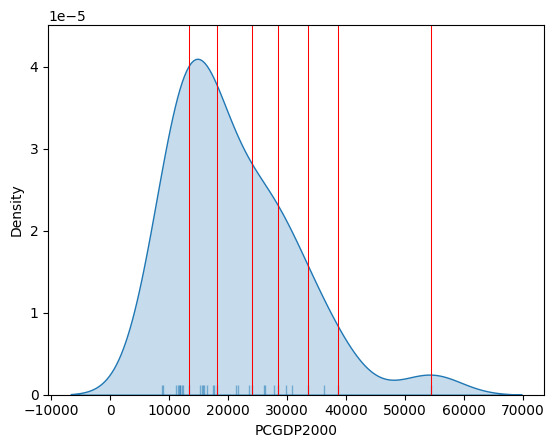

In [22]:
# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(db["PCGDP2000"], fill=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(db["PCGDP2000"], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

For example, the bin with highest values covers a much wider span that the one with lowest, because there are fewer states in that value range.

In summary, there are very many classification schemes to encode values into colors. Although not all of them are integrated into `geopandas`, `PySAL` includes several other classification schemes. 
* For a detailed list, have a look at this [link](https://pysal.org/mapclassify/notebooks/01_maximum_breaks.html)
* For more examples see the corresponding book chapter by Rey, Arribas-Bel and Wolf [here](https://geographicdata.science/book/notebooks/05_choropleth.html). 

### User-defined choropleths

In this last section of the chapter, we consider bespoke partitions of the data that do not follow any particular algorithm but instead are informed by, for example, domain knowledge. Consider the case of classifying income in a policy context. Imagine we wanted to explore the distribution of areas with less than $\$$10,000, then those between $\$$10,000 and $\$$12,500; $\$$12,500 and $\$$15,000; and greater than $\$$15,000. These boundaries are arbitrary but may be tied to specific policies in which the first group is targetted in one particular way, the second and third in different ways, and the fourth is not part of the policy, for example.

To create a choropleth that reflects this partitioning of the data, we can use the `UserDefined` classifier in `mapclassify`:

In [23]:
classi = mapclassify.UserDefined(
    db["PCGDP2000"], [10000, 12500, 15000]
)
classi

UserDefined

      Interval         Count
----------------------------
[ 8684.00, 10000.00] |     2
(10000.00, 12500.00] |     7
(12500.00, 15000.00] |     1
(15000.00, 54349.00] |    22

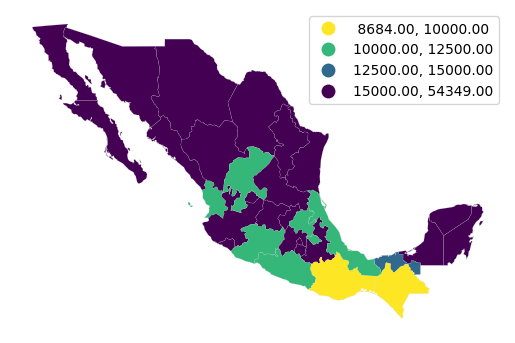

In [24]:
classi.plot(
    db,  # Use geometries in the geo-table
    legend=True,  # Add a legend
    legend_kwds={
        "loc": "upper right"
    },  # Place legend on top right corner
    axis_on=False,  # Remove axis
    cmap="viridis_r",  # Use reverse Viridis
);

## Zooming into the map

### Only show parts of the full map

A general map of an entire region, or urban area, can sometimes obscure local patterns because they happen at a much smaller scale that cannot be perceived in the global view. One way to solve this is by providing a focus of a smaller part of the map in a separate figure. Although there are many ways to do this in Python, the most straightforward one is to reset the limits of the axes to center them in the area of interest.

As an example, let us consider the quantile map produced above:

<Axes: >

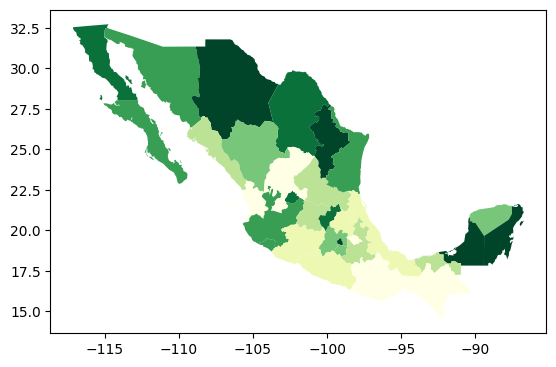

In [25]:
db.plot(
    column="PCGDP2000", 
    scheme="quantiles", 
    k=7,
    cmap="YlGn",
    legend=False
)

If we want to focus around the capital, Mexico DF, the first step involves realising that such area of the map (the little dark green polygon in the SE centre of the map), falls within the coordinates of -102W/-97W, and 18N/21N, roughly speaking. To display a zoom map into that area, we can do as follows:

(-102.0, -97.0)

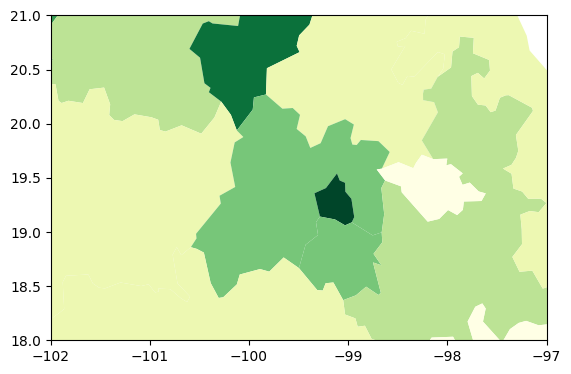

In [26]:
# Setup the figure
f, ax = plt.subplots(1)
# Draw the choropleth
db.plot(
    column="PCGDP2000", 
    scheme="quantiles", 
    k=7,
    cmap="YlGn",
    legend=False,
    ax=ax
)
# Redimensionate X and Y axes to desired bounds
ax.set_ylim(18, 21)
ax.set_xlim(-102, -97)

### Compute a new choropleth for a partial map


The approach above is straightforward, but not necessarily the most efficient one: not that, to generate a map of a potentially very small area, we effectively draw the entire (potentially very large) map, and discard everything except the section we want. This is not straightforward to notice at first sight, but what Python is doing in the code cell above is plottin the entire `db` object, and only then focusing the figure on the X and Y ranges specified in `set_xlim`/`set_ylim`.

Sometimes, this is required. For example, if we want to retain the same coloring used for the national map, but focus on the region around Mexico DF, this approach is the easiest one.


Sometimes, we only need to plot the _geographical features_ within a given range, and we either don't need to keep the national coloring (e.g. we are using a single color), or we want a classification performed _only_ with the features in the region.


For these cases, it is computationally more efficient to select the data we want to plot first, and then display them through `plot`. For this, we can rely on the `cx` operator:

<Axes: >

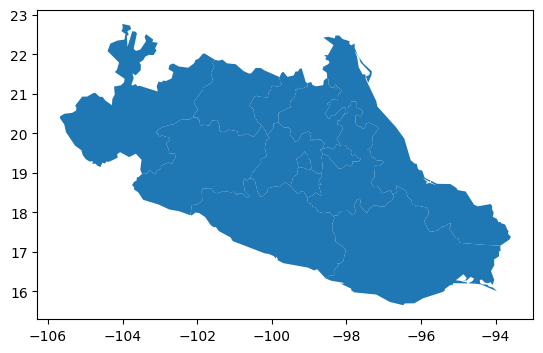

In [27]:
subset = db.cx[-102:-97, 18:21]
subset.plot()

We query the range of spatial coordinates similarly to how we query indices with `loc`. Note however the result includes full geographic features, and hence the polygons with at least some area within the range are included fully. This results in a larger range than originally specified.

This approach is a "spatial slice". If you remember when we saw _non-spatial slices_ (enabled by the `loc` operator), this is a similar approach but our selection criteria, instead of subsetting by indices of the table, are based on the spatial coordinates of the data represented in the table.

Since the result is a `GeoDataFrame` itself, we can create a choropleth that is based only on the data in the subset:

<Axes: >

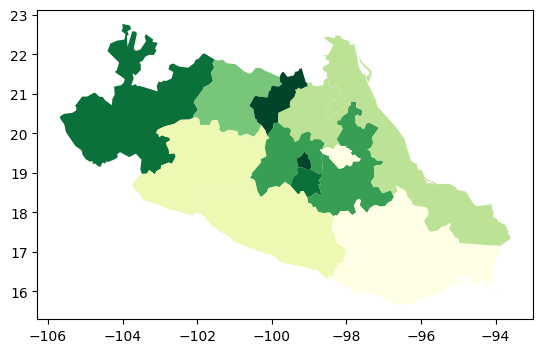

In [28]:
subset.plot(
    column="PCGDP2000", 
    scheme="quantiles", 
    k=7,
    cmap="YlGn",
    legend=False
)

## Pooled classifications

Sometimes choropleths exist as part of larger figures that may include more choropleths. In some cases, each of them can be best considered as an independent map, and then everything we have seen so far applies directly. In other instances, we may want to create a single classification of values __across all__ maps and use it consistently. For those situations, we can create __pooled__ classifications that consider __all the values__ across the series.



To illustrate this approach, we will create a figure with choropleths of GDP per capita in 1940, 1960, 1980, and 2000; and we will use the same classification across the four maps.

In [29]:
# List the years we want of pc GDP
years = ["PCGDP1940", "PCGDP1960", "PCGDP1980", "PCGDP2000"]
# Create pooled classification
pooled = mapclassify.Pooled(db[years], classifier="Quantiles", k=5)

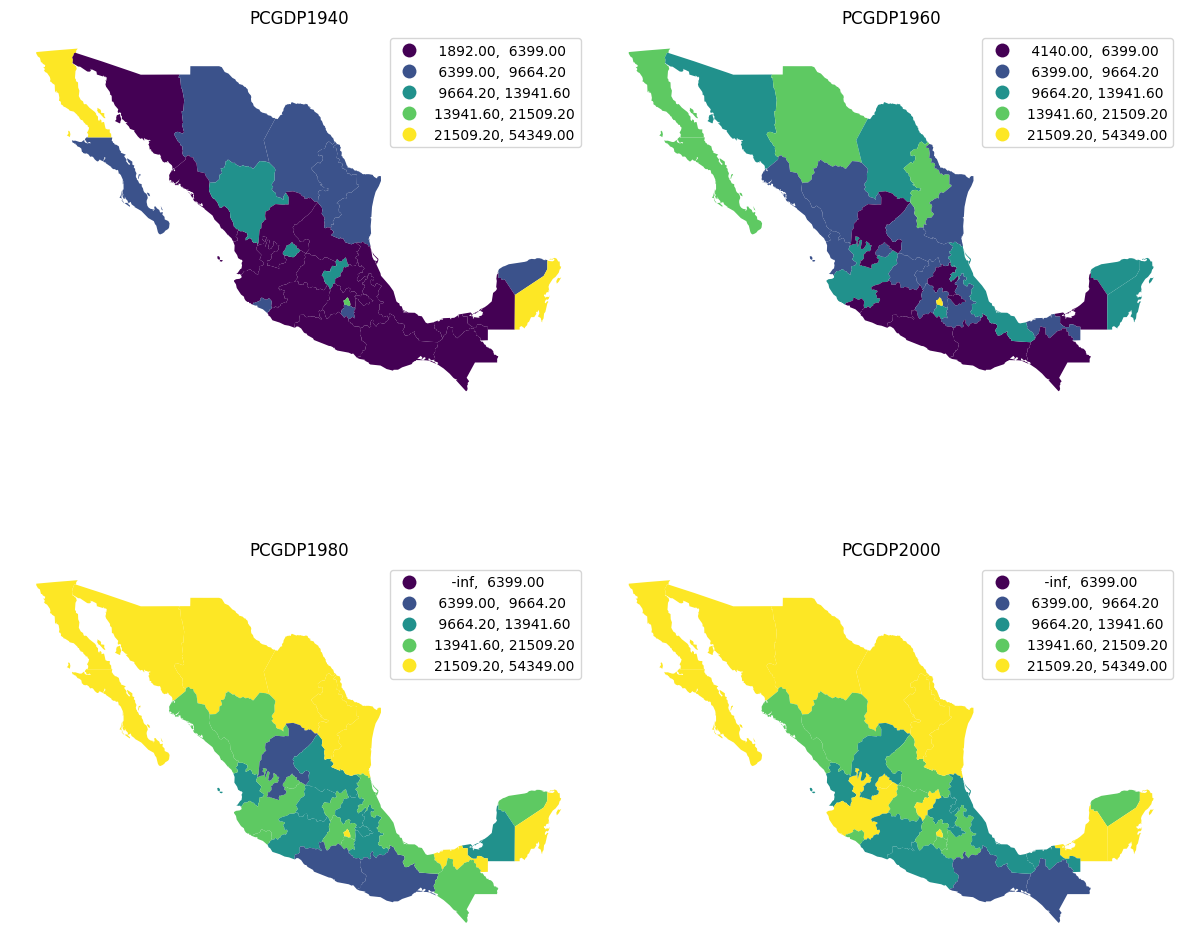

In [30]:
# Set up figure with four axis
f, axs = plt.subplots(2, 2, figsize=(12, 12))
# Flatten the array of axis so you can loop over in one dimension
axs = axs.flatten()
# Loop over each year
for i, y in enumerate(years):
    db.plot(
        y,  # Year to plot
        scheme="UserDefined",  # Use our own bins
        classification_kwds={
            "bins": pooled.global_classifier.bins
        },  # Use global bins
        legend=True,  # Add a legend
        ax=axs[i],  # Plot on the corresponding axis
    )
    # Remove axis
    axs[i].set_axis_off()
    # Name the subplot with the name of the column
    axs[i].set_title(y)
# Tight layout to better use space
plt.tight_layout()
# Display figure
plt.show()

## Further Resources


For more details on choropleth mapping, check out the corresponding book chapter by Rey, Arribas-Bel and Wolf [here](https://geographicdata.science/book/notebooks/05_choropleth.html). In particular, check out the section on __color palettes__. 